# Data Exploration

In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')

In [15]:
merged_df = pd.read_csv("../00_data/1_interim/merged_data.csv", index_col=["Code", "Year"])
filtered_df_01 = pd.read_csv("../00_data/1_interim/filtered_data_01.csv", index_col=["Code", "Year"])

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1200 entries, ('AFG', np.int64(2013)) to ('ZWE', np.int64(2018))
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    1200 non-null   object 
 1   child_mortality_igme                      1200 non-null   float64
 2   annual_healthcare_expenditure_per_capita  1142 non-null   float64
 3   gdp_per_capita_worldbank                  1128 non-null   float64
 4   nurses_and_midwives_per_1000_people       862 non-null    float64
 5   physicians_per_1000_people                753 non-null    float64
 6   prevalence_of_undernourishment            1002 non-null   float64
 7   share_of_population_urban                 1170 non-null   float64
 8   share_without_improved_water              1174 non-null   float64
 9   vaccination_coverage_who_unicef           1164 non-null   float64


In [17]:
merged_df.describe()
# highest U5MR in whole df: 278 deaths per 1000 live births, lowest is 1,7 deaths per 1000 births
# in 25% of the data, U5MR is above 46 per 1000 births
# for half of the data, U5MR is above 17,5 per 1000 birth

,child_mortality_igme,annual_healthcare_expenditure_per_capita,gdp_per_capita_worldbank,nurses_and_midwives_per_1000_people,physicians_per_1000_people,prevalence_of_undernourishment,share_of_population_urban,share_without_improved_water,vaccination_coverage_who_unicef,years_of_schooling
count,1200.000000,1142.000000,1128.000000,862.000000,753.000000,1002.000000,1170.000000,1174.000000,1164.000000,1132.000000
mean,30.641786,1384.140573,22588.782826,4.730940,2.151936,9.836627,58.278545,8.766518,88.289519,8.339549
std,33.522547,1715.310940,23416.547441,4.094242,1.666007,10.225440,23.035379,11.775164,13.337069,3.547940
min,1.749197,25.303010,868.555500,0.101300,0.013000,2.500000,11.482000,0.000000,19.000000,0.672197
25%,7.655497,207.347112,5344.745225,1.349250,0.603000,2.500000,40.047000,0.494207,84.750000,5.268316
50%,17.566985,685.098850,14441.918000,3.913000,2.148000,5.850000,58.026500,3.018631,93.000000,9.004750
75%,46.153776,1805.880075,31796.610500,6.734750,3.299000,13.400000,77.251750,13.830902,97.000000,11.170749
max,278.187220,10182.256000,136454.000000,20.830000,8.568000,62.600000,100.000000,57.326244,99.000000,14.140000


### Histograms

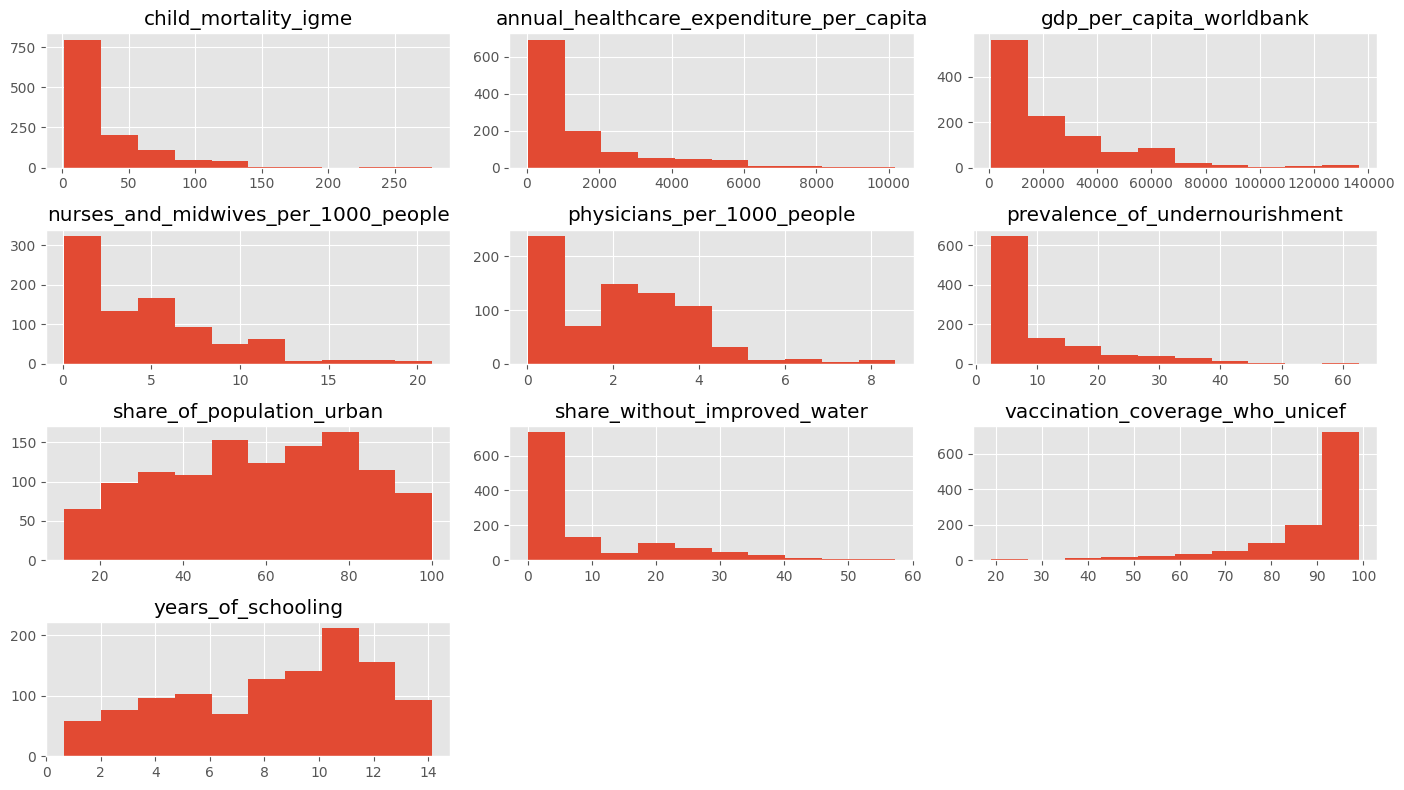

In [30]:
#Histograms of label & features
#FINDING: Label + 6 features haben rechtsschiefe Verteilung (viele Datenpunkte sammeln sich im linken Bereich an)
merged_df.hist(figsize=(14,8))
plt.tight_layout()
plt.show()

### Analysis - First Insights

In [67]:
#Scatterplots - Group by Feature Aspect
def scatterplots(df, features):
    fig, axs = plt.subplots(ncols=3, figsize=(18, 6))
    for id, a in enumerate(axs):
        sns.scatterplot(data=df, x="child_mortality_igme", y=features[id], hue=features[id], 
                        size=features[id], sizes=(25, 100), ax=axs[id])
    plt.show()

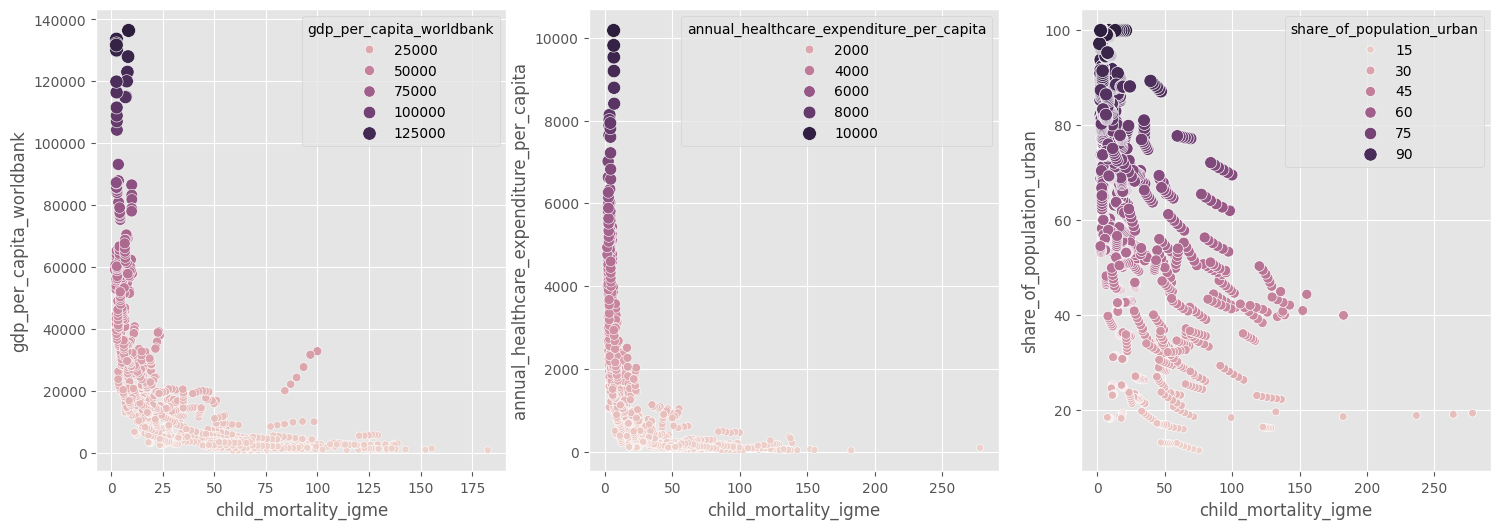

In [74]:
# relationship between label and features (economic/financial, dempgrafic related)
socio_econ = ["gdp_per_capita_worldbank", "annual_healthcare_expenditure_per_capita", "share_of_population_urban"]
scatterplots(filtered_df_01, socio_econ)

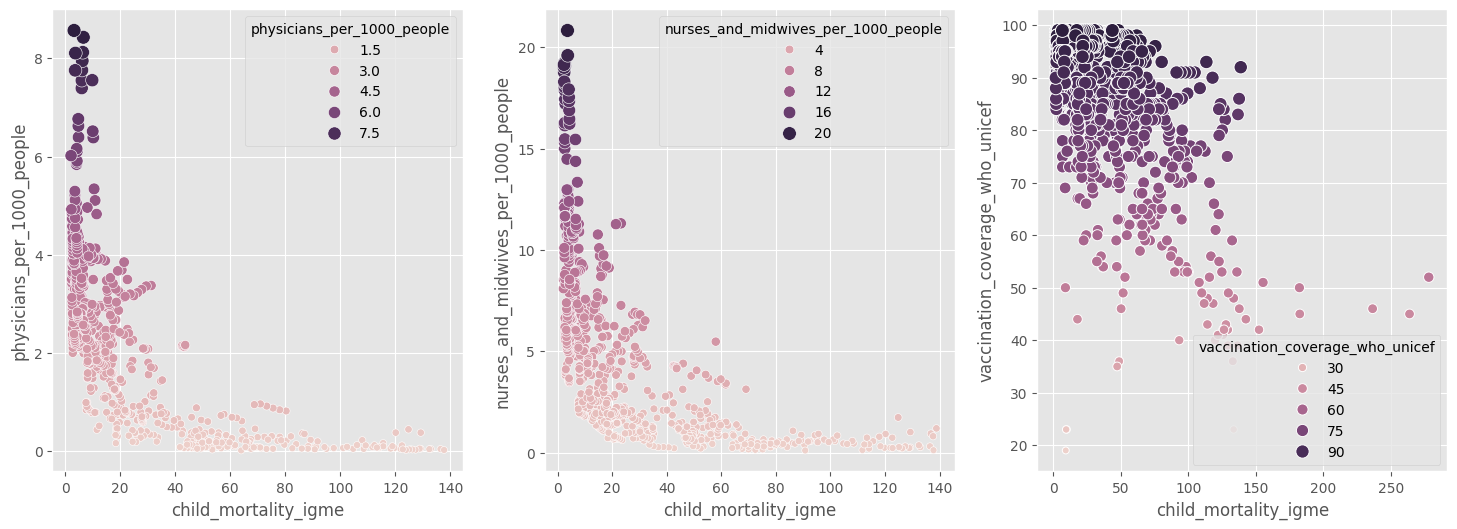

In [72]:
# relationship between label and features (health/medical related)
health_medical = ["physicians_per_1000_people", "nurses_and_midwives_per_1000_people", "vaccination_coverage_who_unicef"]
scatterplots(filtered_df_01, health_medical)

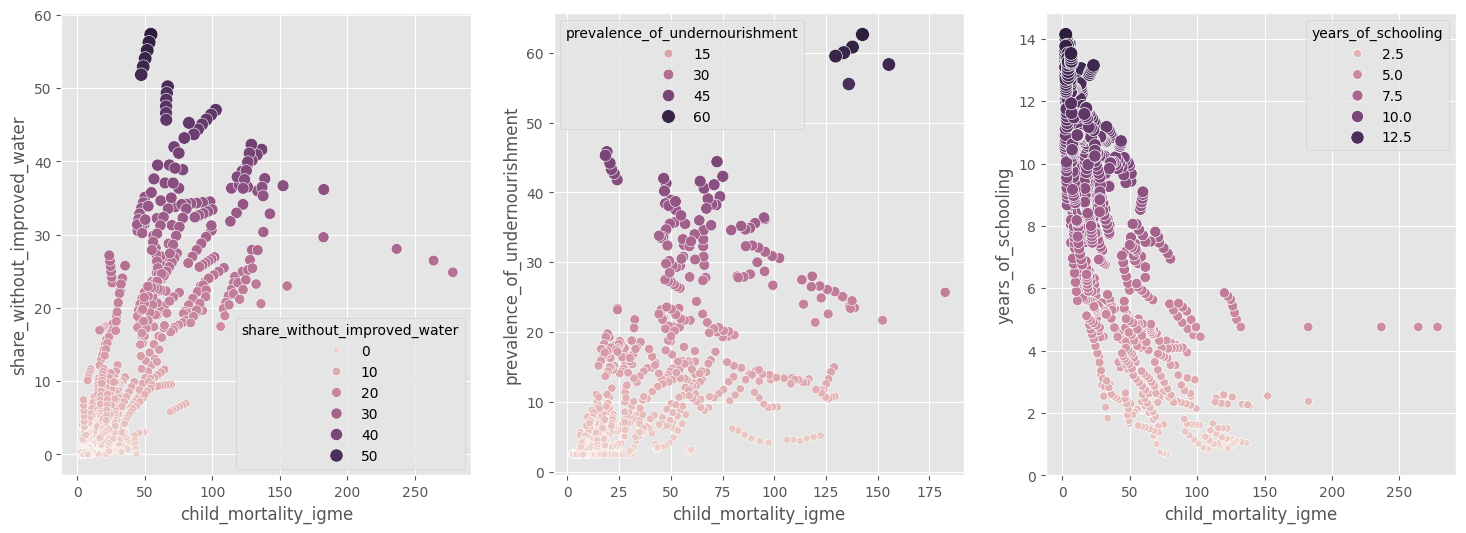

In [73]:
# relationship between label and features (living/development, hygiene related)
living_development = ["share_without_improved_water", "prevalence_of_undernourishment", "years_of_schooling"]
scatterplots(filtered_df_01, living_development)

### Check Missing Values

In [20]:
# Null values count
def count_missing_values(df):
    print(f"DataFrame has {df.isna().sum().sum()} null values in total.\n")
    null_count = df.isna().sum()
    null_count_perc = round((null_count / len(df)) * 100, 2)
    print(f"Missing Values - count for each column:\n\n{null_count}\n\nPercentage of Missing values:\n\n{null_count_perc}")

count_missing_values(merged_df)

DataFrame has 1273 null values in total.

Missing Values - count for each column:

Entity                                        0
child_mortality_igme                          0
annual_healthcare_expenditure_per_capita     58
gdp_per_capita_worldbank                     72
nurses_and_midwives_per_1000_people         338
physicians_per_1000_people                  447
prevalence_of_undernourishment              198
share_of_population_urban                    30
share_without_improved_water                 26
vaccination_coverage_who_unicef              36
years_of_schooling                           68
dtype: int64

Percentage of Missing values:

Entity                                       0.00
child_mortality_igme                         0.00
annual_healthcare_expenditure_per_capita     4.83
gdp_per_capita_worldbank                     6.00
nurses_and_midwives_per_1000_people         28.17
physicians_per_1000_people                  37.25
prevalence_of_undernourishment              

### Missing Values by Code (Country ID)

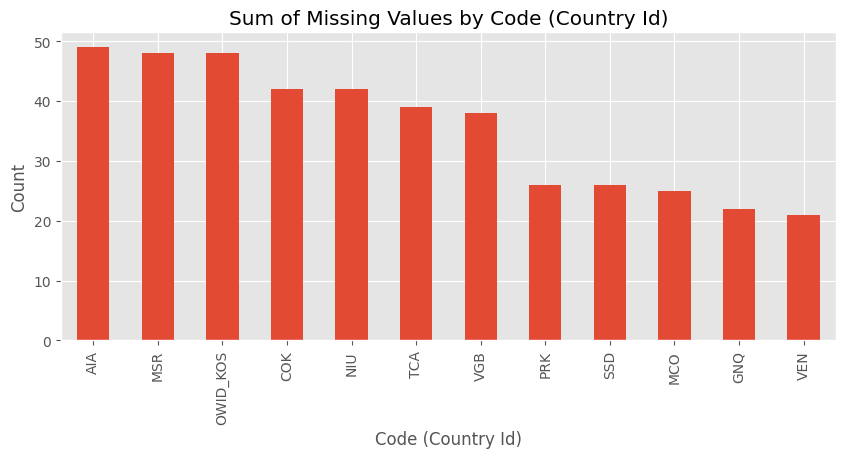

Top 12 Countries with most missing values:
Code
AIA         49
MSR         48
OWID_KOS    48
COK         42
NIU         42
TCA         39
VGB         38
PRK         26
SSD         26
MCO         25
GNQ         22
VEN         21
Name: total_missing, dtype: int64


In [21]:
# Missing Values by Country ID (Code)
all_missing_values = merged_df.isnull().groupby(level=0).sum()
all_missing_values["total_missing"] = all_missing_values.sum(axis=1)
all_missing_values["total_missing_%"] = round( ( all_missing_values["total_missing"] / 54 ) * 100, 2)
#plot top 12 countries with most missing values
top_missing_countries = all_missing_values.sort_values(ascending=False, by="total_missing")
top_12_missing = top_missing_countries["total_missing"].head(12)
top_12_missing.plot(kind="bar", figsize=(10,4))

plt.xlabel("Code (Country Id)")
plt.ylabel("Count")
plt.title("Sum of Missing Values by Code (Country Id)")
plt.show()
print(f"Top 12 Countries with most missing values:\n{top_12_missing}")

In [22]:
#Missing values after first filtered df (7 countries excluded)
count_missing_values(filtered_df_01)

DataFrame has 967 null values in total.

Missing Values - count for each column:

Entity                                        0
child_mortality_igme                          0
annual_healthcare_expenditure_per_capita     16
gdp_per_capita_worldbank                     42
nurses_and_midwives_per_1000_people         300
physicians_per_1000_people                  405
prevalence_of_undernourishment              156
share_of_population_urban                     0
share_without_improved_water                 16
vaccination_coverage_who_unicef               6
years_of_schooling                           26
dtype: int64

Percentage of Missing values:

Entity                                       0.00
child_mortality_igme                         0.00
annual_healthcare_expenditure_per_capita     1.38
gdp_per_capita_worldbank                     3.63
nurses_and_midwives_per_1000_people         25.91
physicians_per_1000_people                  34.97
prevalence_of_undernourishment              1

### Correlations

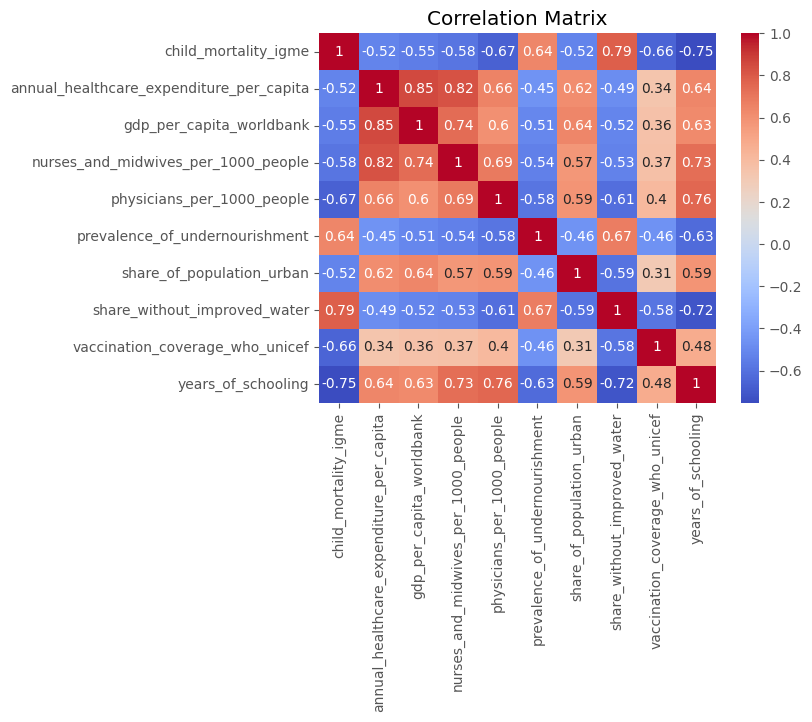

In [23]:
#show correlations between features and label
features_corr = merged_df.copy()
features_corr = features_corr.drop(columns=["Entity"])
corr = features_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()